In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten , Convolution2D, MaxPooling1D,MaxPooling2D , Lambda, Conv1D,Conv2D, Activation,Concatenate,ReLU
from tensorflow.keras.optimizers import Adam , SGD , Adagrad
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, CSVLogger, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from tensorflow.keras import regularizers , initializers
from sklearn.metrics import confusion_matrix
import tensorflow.keras.backend as K
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import models
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-data/new_train200mpc.npy
/kaggle/input/traindatas/8192train200mpc.npy
/kaggle/input/test-data/new_test600mpc.npy
/kaggle/input/test-data/new_test700mpc.npy
/kaggle/input/test-data/new_test800mpc.npy
/kaggle/input/test-data/new_test500mpc.npy
/kaggle/input/test-data/new_test300mpc.npy
/kaggle/input/test-data/new_test200mpc.npy
/kaggle/input/test-data/new_test400mpc.npy
/kaggle/input/testdata/8192_test300mpc.npy
/kaggle/input/testdata/8192_test500mpc.npy
/kaggle/input/testdata/8192_test200mpc.npy
/kaggle/input/testdata/8192_test400mpc.npy
/kaggle/input/testdata/8192_test700mpc.npy
/kaggle/input/testdata/8192_test600mpc.npy
/kaggle/input/testdata/8192_test800mpc.npy
/kaggle/input/200mpc/CNN_new_200mpc.h5
/kaggle/input/trainnn/8192train200mpc (1).npy


In [2]:
traindatas = np.load("/kaggle/input/testdata/8192_test500mpc.npy", allow_pickle = True)
traindata = []
for i in range(traindatas.shape[0]):
    train_tmp = traindatas[i,0,:]
    max_index = np.argmax(train_tmp)
    train = np.array(train_tmp[max_index-10:max_index+11])
    #print(train.shape)
    try:
        traindata.append(train.reshape((21)))
    except:
        print(i)
traindata = np.array(traindata)
print(traindata.shape)

111
727
1015
1257
2147
3217
3609
3897
(4962, 21)


In [3]:
#Label set generation
label_set =[]
for i in range(int(23250/2)):
    label_set.append(1)
    label_set.append(0)
label_set = np.array(label_set)
label_set = to_categorical(np.array(label_set))

#label_set = tf.one_hot(label_set,2)
#Load the train data set file
X = np.load('/kaggle/input/test-data/new_test200mpc.npy', allow_pickle = True)
print(X.shape)
print(label_set.shape)
#X = np.asarray(np.reshape(X,(X.shape[0],X.shape[2]), np.float32)) # "setting an array element with a sequence"
#X = X.reshape(23250,2)
X = np.asarray(X,np.float32)
Y = label_set
#Use 10 percent of the data to validate the model
X_train, X_validation, Y_train, Y_validation = train_test_split (X, Y, test_size =0.1)

#Construct a CNN, Keras used.
model = models.Sequential()
model.add(Conv2D(11, kernel_size = 1, strides=(1, 1) , padding='valid',input_shape = (1,2,21) ,
    data_format='channels_first', activation='relu' ) )
model.add(MaxPooling2D(pool_size=1, strides=None, data_format='channels_first'))
model.add(Conv2D(22, kernel_size = 1, strides=(1, 1) , padding='valid', activation='relu' ) )
model.add(MaxPooling2D(pool_size=1, strides=None, data_format='channels_first'))
model.add(Conv2D(44, kernel_size = 1, strides=(1, 1) , padding='valid', activation='relu' ) )
model.add(Dropout(0.02, noise_shape=None, seed=None))
model.add(MaxPooling2D(pool_size=1, strides=None, data_format='channels_last'))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.summary()

model.compile(#optimizer='adam',
              tf.keras.optimizers.Adam(0.001),
              loss= 'binary_crossentropy',
              metrics=["accuracy"])

# Train the model in 10 epochs.
history = model.fit (X_train, Y_train, batch_size = 32, epochs=10, validation_data=(X_validation, Y_validation))
# Save the model as a h5 file , accessable when testing.
#model.save('21CNN_new_200mpc.h5')

(23250, 1, 2, 21)
(23250, 2)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 11, 2, 21)         22        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 2, 21)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 2, 22)         484       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 2, 22)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 2, 44)         1012      
_________________________________________________________________
dropout (Dropout)            (None, 11, 2, 44)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling

In [4]:
###-------------------- TEST CLASSIFICATION ----------------------###
# Make the correct labels
label_set =[]
for i in range(int(23250/2)):
    label_set . append(1)
    label_set . append(0)
#label_set = to_categorical(np.array(label_set))
label_set = np.array(label_set)

X_train = np.load('/kaggle/input/test-data/new_test200mpc.npy', allow_pickle = True)
X_train = np.asarray(X_train, np.float32 )
Y_train_true = label_set
X_train, Y_train_true = shuffle(X_train, Y_train_true)

X = np.load('/kaggle/input/test-data/new_test200mpc.npy',allow_pickle = True)
X = np.asarray(X, np.float32 )
Y_true = label_set
X, Y_true = shuffle(X, Y_true)

new_model = models.load_model('/kaggle/input/200mpc/CNN_new_200mpc.h5') # Load the model file we trained.
Y_pred = new_model.predict(X) # Label prediction.
Y_pred_train = new_model.predict(X_train) # Label prediction.

#Y_pred = Y_pred . tolist ()
Y_pred = np.array(Y_pred)
Y_pred_train = np.array(Y_pred_train)



# Calculate the loss and accuracy, according to the test data set and its correct labels .
test_loss , test_acc = new_model.evaluate(X, Y_true, verbose=2)
train_loss , train_acc = new_model.evaluate(X_train, Y_train_true, verbose=2)

727/727 - 1s - loss: 3.2668e-04 - accuracy: 0.9998
727/727 - 1s - loss: 3.2668e-04 - accuracy: 0.9998


In [5]:
Y_train_true = to_categorical(Y_train_true)
Y_true = to_categorical(Y_true)


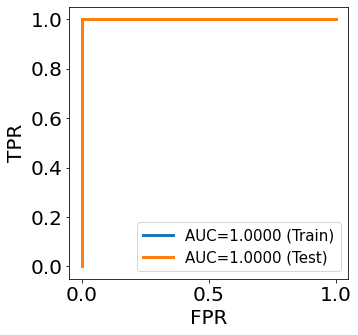

In [6]:
#Define axis for ROC
axis = 0
if axis == 0:
    Class = "noise"
    other = "signal"
elif axis == 1:
    Class = "signal"
    other = "noise"

#Calculate AUC
auc_train = metrics.roc_auc_score(Y_train_true[:,axis],Y_pred_train[:,axis])
auc_test = metrics.roc_auc_score(Y_true[:,axis],Y_pred[:,axis])



#Calculate FPR and TPR
FalsePositive_train, TruePositive_train, _ = metrics.roc_curve(Y_train_true[:,axis],Y_pred_train[:,axis])
FalsePositive_test, TruePositive_test, _ = metrics.roc_curve(Y_true[:,axis],Y_pred[:,axis])


#Generate ROC figure
fig, ax = plt.subplots(1,1, figsize=(5,5))


plt.plot(FalsePositive_train, TruePositive_train,linewidth = 3, linestyle="-", label='AUC={0:.4f} (Train)'.format(auc_train))
plt.plot(FalsePositive_test, TruePositive_test,linewidth = 3, linestyle="-", label='AUC={0:.4f} (Test)'.format(auc_test))

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylabel("TPR",fontsize=20)
plt.xlabel("FPR",fontsize=20)
plt.legend(ncol=1,fontsize=15) 
plt.show()

# confusion matrix
# import seaborn as sns
# target_test_1D = []
# for row in target_test:
#     target_test_1D.append(np.argmax(row))
    
# prediction_test_1D = []
# for row in prediction_test:
#     prediction_test_1D.append(np.argmax(row))
    
# data_test_pred = {'y_test': target_test_1D,'y_pred': prediction_test_1D} 
# df = pd.DataFrame(data_test_pred, columns=['y_test','y_pred'])


# confusion_matrix = pd.crosstab(df['y_test'], df['y_pred'], rownames=['Test'], colnames=['Predicted'],margins = True)
# print ("\nconfusion_matrix of test data :\n",confusion_matrix)


# plt.figure(figsize=(8,6))


# sns.heatmap(confusion_matrix, annot=True)
# plt.title("confusion_matrix of test data")


# plt.show()

# Parameter Estimation

In [7]:
X = np.load('/kaggle/input/train-data/new_train200mpc.npy', allow_pickle = True)

spin1z_range = np.linspace(0.1, 0.9,5)
spin2z_range = spin1z_range

X_PE = []
print(X.shape)
for i in range(0,23250,2):
    X_PE.append(X[i,:,:])
X_PE = np.array(X_PE)
print(X_PE.shape)
label_set = []
for m1 in np.linspace(20,50,30):
    for m2 in np.linspace(20,50,30):
        if m1 <= m2:
            for i3 in range(len(spin1z_range)):
                for i4 in range(len(spin2z_range)):
                    label_set.append([m1,m2])
label_set = np.array(label_set)
Y = label_set
print(Y.shape)
X_PE = np.asarray(X_PE,np.float32)
X_PE, Y = shuffle(X_PE, Y)
#Use 10 percent of the data to validate the model
X_train, X_validation, Y_train, Y_validation = train_test_split (X_PE, Y, test_size =0.1)

#Construct a CNN, Keras used.
model = models.Sequential()
model.add(Conv2D(11, kernel_size = 1, strides=(1, 1) , padding='valid',input_shape = (1,2,21) ,
    data_format='channels_first', activation='relu' ) )
model.add(MaxPooling2D(pool_size=1, strides=None, data_format='channels_first'))
model.add(Conv2D(22, kernel_size = 1, strides=(1, 1) , padding='valid', activation='relu' ) )
model.add(MaxPooling2D(pool_size=1, strides=None, data_format='channels_first'))
model.add(Conv2D(44, kernel_size = 1, strides=(1, 1) , padding='valid', activation='relu' ) )

model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(MaxPooling2D(pool_size=1, strides=None, data_format='channels_last'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(ReLU())
model.add(Dense(2, activation='relu'))
#model.add(ReLU())

model.summary()

model.compile(#optimizer='adam',
              tf.keras.optimizers.Adam(0.001),
              loss= 'mse',
              metrics=["mape"])

# Train the model in 10 epochs.
history = model.fit (X_train, Y_train, batch_size = 128, epochs=60, validation_data=(X_validation, Y_validation))
# Save the model as a h5 file , accessable when testing.
model.save('/kaggle/output/21CNN_PE_200mpc.h5')

(23250, 1, 2, 21)
(11625, 1, 2, 21)
(11625, 2)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 11, 2, 21)         22        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 2, 21)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 2, 22)         484       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 2, 22)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 2, 44)         1012      
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 2, 44)         0         
_________________________________________________________________
max_poo

In [8]:
from tensorflow.keras import models

# Load the model file we trained.
new_model = models.load_model('/kaggle/output/21CNN_PE_200mpc.h5')



# make correct labels
label_set = []
for m1 in np.linspace(20.5,50.5,30):
    for m2 in np.linspace(20.5,50.5,30):
        if m1 <= m2:
            for spin1 in range(len(spin1z_range)):
                for spin2 in range(len(spin1z_range)):
                    label_set.append([m1,m2])
label_set = np.array(label_set)[:,:]
Y_true = label_set
print(Y_true.shape)


loss = []
acc = []

#for i in range(2,9):
test_set = np.load('/kaggle/input/test-data/new_test600mpc.npy', allow_pickle = True)

X_test = []
for i in range(0,23250,2):
    X_test.append(test_set[i,:,:])
X_test = np.array(X_test)[:,:,:]
X_test = np.asarray(X_test , np.float32)

X_test, Y_true = shuffle(X_test, Y_true)

Y_pred = new_model.predict(X_test) # Label prediction.
print( Y_pred.shape)
Y_pred = Y_pred.tolist ()

#X_test = np.load('/kaggle/input/testdata/8192_test{}00mpc.npy'.format(2),allow_pickle = True)
#X_test = X_test[:,:,-4096:]
#X = np.asarray(X, np.float32 )
#Y_test = to_categorical(label_set)
print(X_test.shape)
# Calculate the loss and accuracy, according to the test data set and its correct labels .
test_loss , test_acc = new_model.evaluate(X_test, Y_true, verbose=2)
loss.append(test_loss)
acc.append(test_acc)

(11625, 2)
(11625, 2)
(11625, 1, 2, 21)
364/364 - 1s - loss: 12.9975 - mape: 8.9625


In [9]:
Y_pred = np.array(Y_pred)
Y_true = np.array(Y_true)

mape = []
mass_ave = []
chirp = []
for i in range(11625):
    mape.append(100*np.absolute(Y_pred[i,0] - Y_true[i,0] + Y_pred[i,1] - Y_true[i,1])/(Y_true[i,0]+Y_true[i,1]))
    mass_ave.append((Y_true[i,0] + Y_true[i,1])/2)
    chirp.append((Y_pred[i,0]*Y_pred[i,1])**(3/5)/(Y_pred[i,0]+Y_pred[i,1])**(1/5))
chirp = np.array(chirp)
mape = np.array(mape)

# plt.scatter(chirp,mape)
# plt.xlabel(r"chirp mass")
# plt.ylabel(r"Mean absolute percentage error")
# plt.savefig("/kaggle/output/PE_result1.png")
# plt.show()



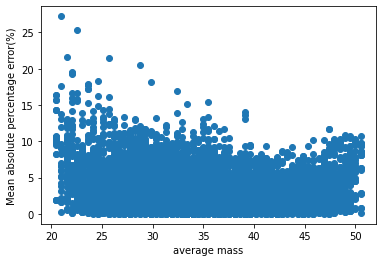

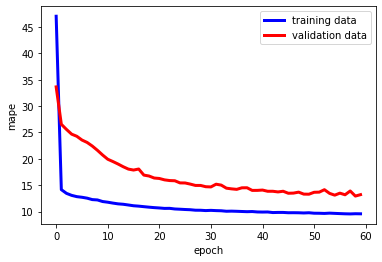

In [10]:
plt.scatter(mass_ave,mape)
plt.xlabel(r"average mass")
plt.ylabel(r"Mean absolute percentage error(%)")
#plt.savefig("/kaggle/output/PE_result1.png")
plt.show()

plt.plot(history.history["mape"], label='training data',c='blue',linewidth = 3)
plt.plot(history.history["val_loss"], label='validation data',c='red',linewidth = 3)
plt.xlabel("epoch")
plt.ylabel("mape")

plt.legend()
plt.show()